<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200> 

# Assignment:

- Replicate the lesson code.

 - This means that if you haven't followed along already, type out the things that we did in class. Forcing your fingers to hit each key will help you internalize the syntax of what we're doing. Make sure you understand each line of code that you're writing, google things that you don't fully understand.
 - [Lambda Learning Method for DS - By Ryan Herr](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit?usp=sharing)
- Convert the `term` column from string to integer.
- Make a column named `loan_status_is_great`. It should contain the integer 1 if `loan_status` is "Current" or "Fully Paid." Else it should contain the integer 0.
- Make `last_pymnt_d_month` and `last_pymnt_d_year` columns.

In [1]:
##### Begin Working Here #####

!wget https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip

--2019-11-02 00:42:35--  https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip
Resolving resources.lendingclub.com (resources.lendingclub.com)... 64.48.1.20
Connecting to resources.lendingclub.com (resources.lendingclub.com)|64.48.1.20|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘LoanStats_2018Q4.csv.zip’

LoanStats_2018Q4.cs     [             <=>    ]  21.66M   777KB/s    in 29s     

2019-11-02 00:43:04 (759 KB/s) - ‘LoanStats_2018Q4.csv.zip’ saved [22709125]



In [2]:
!unzip LoanStats_2018Q4.csv.zip

Archive:  LoanStats_2018Q4.csv.zip
  inflating: LoanStats_2018Q4.csv    


In [4]:
!head LoanStats_2018Q4.csv

Notes offered by Prospectus (https://www.lendingclub.com/info/prospectus.action)
"id","member_id","loan_amnt","funded_amnt","funded_amnt_inv","term","int_rate","installment","grade","sub_grade","emp_title","emp_length","home_ownership","annual_inc","verification_status","issue_d","loan_status","pymnt_plan","url","desc","purpose","title","zip_code","addr_state","dti","delinq_2yrs","earliest_cr_line","inq_last_6mths","mths_since_last_delinq","mths_since_last_record","open_acc","pub_rec","revol_bal","revol_util","total_acc","initial_list_status","out_prncp","out_prncp_inv","total_pymnt","total_pymnt_inv","total_rec_prncp","total_rec_int","total_rec_late_fee","recoveries","collection_recovery_fee","last_pymnt_d","last_pymnt_amnt","next_pymnt_d","last_credit_pull_d","collections_12_mths_ex_med","mths_since_last_major_derog","policy_code","application_type","annual_inc_joint","dti_joint","verification_status_joint","acc_now_delinq","tot_coll_amt","tot_cur_bal","open_acc_6m","open_act_il","op

In [0]:
# Import libraries
import pandas as pd
import numpy as np

In [9]:
df = pd.read_csv('LoanStats_2018Q4.csv', skiprows = 1, skipfooter = 2) # Get rid of the extra line at top and bottom 2 lines
df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,35000,35000,35000.0,36 months,14.47%,1204.23,C,C2,Staff Physician,8 years,MORTGAGE,360000.0,Verified,Dec-2018,Fully Paid,n,NaN,NaN,credit_card,Credit card refinancing,336xx,FL,19.90,0,Apr-1995,1,NaN,NaN,24,0,57259,43.2%,51,w,0.00,0.00,38187.046837,38187.05,...,30.8,0,0,1222051,169286,124600,258401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,5000,5000,5000.0,36 months,22.35%,191.86,D,D5,Director of Sales,10+ years,MORTGAGE,72000.0,Source Verified,Dec-2018,Fully Paid,n,NaN,NaN,debt_consolidation,Debt consolidation,333xx,FL,20.12,0,Mar-2010,0,NaN,NaN,13,0,11720,47.1%,26,f,0.00,0.00,5615.977674,5615.98,...,50.0,0,0,218686,34418,18200,37786,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,10000,10000,10000.0,60 months,23.40%,284.21,E,E1,NaN,< 1 year,RENT,55000.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,902xx,CA,13.51,0,Apr-2007,0,44.0,88.0,9,1,11859,53.9%,11,w,9025.41,9025.41,2822.600000,2822.60,...,100.0,1,0,34386,21235,10500,12386,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,17100,17100,17100.0,36 months,18.94%,626.30,D,D2,Receptionist,10+ years,RENT,38000.0,Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,150xx,PA,38.09,0,Mar-1998,1,47.0,NaN,14,0,15323,53%,21,w,13271.86,13271.86,6236.010000,6236.01,...,75.0,0,0,70954,43351,16600,41784,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,4000,4000,4000.0,36 months,10.72%,130.43,B,B2,Extrusion assistant,10+ years,MORTGAGE,56000.0,Verified,Dec-2018,Current,n,NaN,NaN,credit_card,Credit card refinancing,301xx,GA,31.03,0,Sep-2006,0,NaN,NaN,7,0,4518,28.6%,11,w,3014.03,3014.03,1291.210000,1291.21,...,0.0,0,0,221310,71375,12300,77865,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df.shape

(128412, 144)

In [11]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'orig_projected_additional_accrued_interest',
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'debt_settlement_flag', 'debt_settlement_flag_date',
       'settlement_status', 'settlement_date', 'settlement_amount',
       'settlement_percentage', 'settlement_term'],
      dtype='object', length=144)

In [13]:
pd.options.display.max_rows = 999
pd.options.display.max_columns = 100

df.isnull().sum().sort_values(ascending = False)

id                                            128412
desc                                          128412
member_id                                     128412
url                                           128412
orig_projected_additional_accrued_interest    128283
hardship_type                                 128276
hardship_last_payment_amount                  128276
hardship_payoff_balance_amount                128276
hardship_reason                               128276
hardship_loan_status                          128276
hardship_dpd                                  128276
hardship_length                               128276
payment_plan_start_date                       128276
hardship_end_date                             128276
hardship_start_date                           128276
hardship_amount                               128276
deferral_term                                 128276
hardship_status                               128276
settlement_percentage                         

In [17]:
df['int_rate'].dtype

dtype('O')

In [0]:
def convert_int_rate_to_float(int_string):
  return float(int_string.strip().strip('%'))

In [0]:
df['int_rate_float'] = df['int_rate'].apply(convert_int_rate_to_float)

In [21]:
df[['int_rate', 'int_rate_float']].head()

,int_rate,int_rate_float
0,14.47%,14.47
1,22.35%,22.35
2,23.40%,23.40
3,18.94%,18.94
4,10.72%,10.72


In [23]:
df['int_rate_float'].dtype

dtype('float64')

In [25]:
df['emp_title'].nunique()

43892

In [28]:
df['emp_title'].value_counts(ascending = False, dropna = False)

NaN                                 20947
Teacher                              2090
Manager                              1773
Registered Nurse                      952
Driver                                924
                                    ...  
Auditor II                              1
Home Care Coding Team Leader            1
Rebuild mechanic                        1
Office Manager/Inside Sales             1
Development Services Coordinator        1
Name: emp_title, Length: 43893, dtype: int64

In [0]:
def clean_emp_title(some_title):
  if isinstance(some_title, str):
    return some_title.strip().title()
  else:
    return 'Unknown'

In [0]:
df['clean_emp_title'] = df['emp_title'].apply(clean_emp_title)

In [31]:
df[['emp_title', 'clean_emp_title']].head()

,emp_title,clean_emp_title
0,Staff Physician,Staff Physician
1,Director of Sales,Director Of Sales
2,NaN,Unknown
3,Receptionist,Receptionist
4,Extrusion assistant,Extrusion Assistant


In [37]:
df['emp_title_director'] = df['clean_emp_title'].str.contains('Director')
df[['emp_title_director', 'clean_emp_title']].sample(10)

,emp_title_director,clean_emp_title
40790,False,Unknown
89206,False,Saftey
6360,False,Regional Sales Manager
6206,False,Research Analyst
82070,False,Risk Control Officer
101512,False,Senior Project Manager
106560,False,Patient Service Representative
14795,False,Housekeeper
19904,False,Office Manager
82733,False,Teller Supervisor


In [39]:
df['term'].head()

0     36 months
1     36 months
2     60 months
3     36 months
4     36 months
Name: term, dtype: object

In [0]:
def clean_term(month_term):
  return int(month_term.strip(' months'))

In [0]:
df['clean_term'] = df['term'].apply(clean_term)

In [50]:
df[['clean_term', 'term']]

,clean_term,term
0,36,36 months
1,36,36 months
2,60,60 months
3,36,36 months
4,36,36 months
...,...,...
128407,36,36 months
128408,36,36 months
128409,36,36 months
128410,36,36 months


In [51]:
df['clean_term'].dtype

dtype('int64')

In [52]:
df['loan_status'].head()

0    Fully Paid
1    Fully Paid
2       Current
3       Current
4       Current
Name: loan_status, dtype: object

In [0]:
def clean_loan_status(loan_status):
  if loan_status == 'Fully Paid' or loan_status == 'Current':
    return 1
  else:
    return 0

In [0]:
df['loan_status_is_great'] = df['loan_status'].apply(clean_loan_status)

In [60]:
df[['loan_status', 'loan_status_is_great']].sample(10)

,loan_status,loan_status_is_great
108323,Current,1
106680,Charged Off,0
69992,Current,1
15309,Current,1
122802,Current,1
76050,Current,1
48938,Current,1
32376,Late (16-30 days),0
95682,Current,1
46239,Current,1


In [61]:
df['last_pymnt_d']

0         Aug-2019
1         Jul-2019
2         Oct-2019
3         Oct-2019
4         Oct-2019
            ...   
128407    Dec-2018
128408    Oct-2019
128409    Oct-2019
128410    Oct-2019
128411    Oct-2019
Name: last_pymnt_d, Length: 128412, dtype: object

In [0]:
df['last_pymnt_d_clean'] = pd.to_datetime(df['last_pymnt_d'], infer_datetime_format= True)

In [63]:
df[['last_pymnt_d', 'last_pymnt_d_clean']].head()

,last_pymnt_d,last_pymnt_d_clean
0,Aug-2019,2019-08-01
1,Jul-2019,2019-07-01
2,Oct-2019,2019-10-01
3,Oct-2019,2019-10-01
4,Oct-2019,2019-10-01


In [0]:
df['last_pymnt_d_month'] = df['last_pymnt_d_clean'].dt.month

In [66]:
df[['last_pymnt_d_month', 'last_pymnt_d_clean']].head()

,last_pymnt_d_month,last_pymnt_d_clean
0,8.0,2019-08-01
1,7.0,2019-07-01
2,10.0,2019-10-01
3,10.0,2019-10-01
4,10.0,2019-10-01


In [0]:
df['last_pymnt_d_year'] = df['last_pymnt_d_clean'].dt.year

In [68]:
df[['last_pymnt_d_year', 'last_pymnt_d_clean']].head()

,last_pymnt_d_year,last_pymnt_d_clean
0,2019.0,2019-08-01
1,2019.0,2019-07-01
2,2019.0,2019-10-01
3,2019.0,2019-10-01
4,2019.0,2019-10-01


In [0]:
# Filtering

term_36 = df[(df['clean_term'] == 36)]

In [77]:
term_36.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,...,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,int_rate_float,clean_emp_title,emp_title_director,clean_term,loan_status_is_great,last_pymnt_d_clean,last_pymnt_d_month,last_pymnt_d_year
0,NaN,NaN,35000,35000,35000.0,36 months,14.47%,1204.23,C,C2,Staff Physician,8 years,MORTGAGE,360000.0,Verified,Dec-2018,Fully Paid,n,NaN,NaN,credit_card,Credit card refinancing,336xx,FL,19.90,0,Apr-1995,1,NaN,NaN,24,0,57259,43.2%,51,w,0.00,0.00,38187.046837,38187.05,35000.00,3187.05,0.0,0.0,0.0,Aug-2019,29882.16,NaN,Sep-2019,0,...,5,100.0,30.8,0,0,1222051,169286,124600,258401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,14.47,Staff Physician,False,36,1,2019-08-01,8.0,2019.0
1,NaN,NaN,5000,5000,5000.0,36 months,22.35%,191.86,D,D5,Director of Sales,10+ years,MORTGAGE,72000.0,Source Verified,Dec-2018,Fully Paid,n,NaN,NaN,debt_consolidation,Debt consolidation,333xx,FL,20.12,0,Mar-2010,0,NaN,NaN,13,0,11720,47.1%,26,f,0.00,0.00,5615.977674,5615.98,5000.00,615.98,0.0,0.0,0.0,Jul-2019,4474.13,NaN,Aug-2019,0,...,1,100.0,50.0,0,0,218686,34418,18200,37786,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,22.35,Director Of Sales,True,36,1,2019-07-01,7.0,2019.0
3,NaN,NaN,17100,17100,17100.0,36 months,18.94%,626.30,D,D2,Receptionist,10+ years,RENT,38000.0,Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,150xx,PA,38.09,0,Mar-1998,1,47.0,NaN,14,0,15323,53%,21,w,13271.86,13271.86,6236.010000,6236.01,3828.14,2407.87,0.0,0.0,0.0,Oct-2019,626.30,Nov-2019,Oct-2019,0,...,2,95.0,75.0,0,0,70954,43351,16600,41784,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,18.94,Receptionist,False,36,1,2019-10-01,10.0,2019.0
4,NaN,NaN,4000,4000,4000.0,36 months,10.72%,130.43,B,B2,Extrusion assistant,10+ years,MORTGAGE,56000.0,Verified,Dec-2018,Current,n,NaN,NaN,credit_card,Credit card refinancing,301xx,GA,31.03,0,Sep-2006,0,NaN,NaN,7,0,4518,28.6%,11,w,3014.03,3014.03,1291.210000,1291.21,985.97,305.24,0.0,0.0,0.0,Oct-2019,130.43,Nov-2019,Oct-2019,1,...,0,100.0,0.0,0,0,221310,71375,12300,77865,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,10.72,Extrusion Assistant,False,36,1,2019-10-01,10.0,2019.0
5,NaN,NaN,10475,10475,10475.0,36 months,11.31%,344.48,B,B3,Teacher,6 years,RENT,66150.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt

In [0]:
import seaborn as sns

In [78]:
term_36.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'settlement_percentage', 'settlement_term', 'int_rate_float',
       'clean_emp_title', 'emp_title_director', 'clean_term',
       'loan_status_is_great', 'last_pymnt_d_clean', 'last_pymnt_d_month',
       'last_pymnt_d_year'],
      dtype='object', length=152)

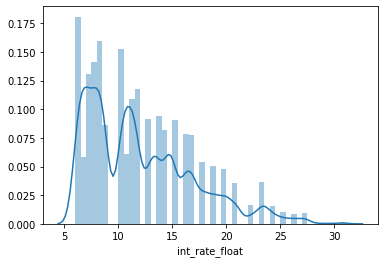

In [79]:
sns.distplot(term_36['int_rate_float'])

# Stretch Goals

You can do more with the LendingClub or Instacart datasets.

LendingClub options:
- There's one other column in the dataframe with percent signs. Remove them and convert to floats. You'll need to handle missing values.
- Modify the `emp_title` column to replace titles with 'Other' if the title is not in the top 20. 
- Take initiatve and work on your own ideas!

Instacart options:
- Read [Instacart Market Basket Analysis, Winner's Interview: 2nd place, Kazuki Onodera](http://blog.kaggle.com/2017/09/21/instacart-market-basket-analysis-winners-interview-2nd-place-kazuki-onodera/), especially the **Feature Engineering** section. (Can you choose one feature from his bulleted lists, and try to engineer it with pandas code?)
- Read and replicate parts of [Simple Exploration Notebook - Instacart](https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-instacart). (It's the Python Notebook with the most upvotes for this Kaggle competition.)
- Take initiative and work on your own ideas!

You can uncomment and run the cells below to re-download and extract the Instacart data

In [0]:
# !wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

In [0]:
# !tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

In [0]:
# %cd instacart_2017_05_01

In [80]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'settlement_percentage', 'settlement_term', 'int_rate_float',
       'clean_emp_title', 'emp_title_director', 'clean_term',
       'loan_status_is_great', 'last_pymnt_d_clean', 'last_pymnt_d_month',
       'last_pymnt_d_year'],
      dtype='object', length=152)

In [81]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,...,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,int_rate_float,clean_emp_title,emp_title_director,clean_term,loan_status_is_great,last_pymnt_d_clean,last_pymnt_d_month,last_pymnt_d_year
0,NaN,NaN,35000,35000,35000.0,36 months,14.47%,1204.23,C,C2,Staff Physician,8 years,MORTGAGE,360000.0,Verified,Dec-2018,Fully Paid,n,NaN,NaN,credit_card,Credit card refinancing,336xx,FL,19.90,0,Apr-1995,1,NaN,NaN,24,0,57259,43.2%,51,w,0.00,0.00,38187.046837,38187.05,35000.00,3187.05,0.0,0.0,0.0,Aug-2019,29882.16,NaN,Sep-2019,0,...,5,100.0,30.8,0,0,1222051,169286,124600,258401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,14.47,Staff Physician,False,36,1,2019-08-01,8.0,2019.0
1,NaN,NaN,5000,5000,5000.0,36 months,22.35%,191.86,D,D5,Director of Sales,10+ years,MORTGAGE,72000.0,Source Verified,Dec-2018,Fully Paid,n,NaN,NaN,debt_consolidation,Debt consolidation,333xx,FL,20.12,0,Mar-2010,0,NaN,NaN,13,0,11720,47.1%,26,f,0.00,0.00,5615.977674,5615.98,5000.00,615.98,0.0,0.0,0.0,Jul-2019,4474.13,NaN,Aug-2019,0,...,1,100.0,50.0,0,0,218686,34418,18200,37786,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,22.35,Director Of Sales,True,36,1,2019-07-01,7.0,2019.0
2,NaN,NaN,10000,10000,10000.0,60 months,23.40%,284.21,E,E1,NaN,< 1 year,RENT,55000.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,902xx,CA,13.51,0,Apr-2007,0,44.0,88.0,9,1,11859,53.9%,11,w,9025.41,9025.41,2822.600000,2822.60,974.59,1848.01,0.0,0.0,0.0,Oct-2019,284.21,Nov-2019,Oct-2019,0,...,0,90.9,100.0,1,0,34386,21235,10500,12386,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,23.40,Unknown,False,60,1,2019-10-01,10.0,2019.0
3,NaN,NaN,17100,17100,17100.0,36 months,18.94%,626.30,D,D2,Receptionist,10+ years,RENT,38000.0,Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,150xx,PA,38.09,0,Mar-1998,1,47.0,NaN,14,0,15323,53%,21,w,13271.86,13271.86,6236.010000,6236.01,3828.14,2407.87,0.0,0.0,0.0,Oct-2019,626.30,Nov-2019,Oct-2019,0,...,2,95.0,75.0,0,0,70954,43351,16600,41784,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,18.94,Receptionist,False,36,1,2019-10-01,10.0,2019.0
4,NaN,NaN,4000,4000,4000.0,36 months,10.72%,130.43,B,B2,Extrusion assistant,10+ years,MORTGAGE,56000.0,Verified,Dec-2018,Current,n,NaN,NaN,credit_card,C

In [82]:
df['revol_util'].head()

0    43.2%
1    47.1%
2    53.9%
3      53%
4    28.6%
Name: revol_util, dtype: object

In [83]:
df['revol_util'].isnull().sum()

156

In [86]:
df['revol_util'].value_counts()

0%        1132
43%        225
49%        222
39.1%      220
32%        217
          ... 
103.6%       1
106.3%       1
108.1%       1
110.3%       1
101.9%       1
Name: revol_util, Length: 1074, dtype: int64

In [0]:
def clean_revol_util(revol_util_num):
  if isinstance(revol_util_num, str):
    return float(revol_util_num.strip('%'))
  else:
    return 0.0

In [0]:
df['revol_util_clean'] = df['revol_util'].apply(clean_revol_util)

In [96]:
df[['revol_util', 'revol_util_clean']].head()

,revol_util,revol_util_clean
0,43.2%,43.2
1,47.1%,47.1
2,53.9%,53.9
3,53%,53.0
4,28.6%,28.6


In [97]:
df['revol_util_clean'].isnull().sum()

0

In [98]:
df['emp_title'].value_counts()

Teacher                         2090
Manager                         1773
Registered Nurse                 952
Driver                           924
RN                               726
                                ... 
Auditor II                         1
Home Care Coding Team Leader       1
Rebuild mechanic                   1
Office Manager/Inside Sales        1
Operations Sales Leader            1
Name: emp_title, Length: 43892, dtype: int64

In [0]:
top_20_titles = [title for title in df['emp_title'].value_counts()]

In [0]:
new_list = df['emp_title'].value_counts().index

In [0]:
top_20_list = new_list[:20]

In [127]:
len(top_20_list)

20

In [0]:
def top_20_emp_title(emp_title):

  if isinstance(emp_title, str):
    if emp_title in top_20_list:
      return emp_title.strip().title()
    else:
      return 'Other'
  else:
    return 'Unknown'

In [0]:
df['emp_title_top_20'] = df['emp_title'].apply(top_20_emp_title)

In [140]:
df[['emp_title', 'emp_title_top_20']].sample(10)

,emp_title,emp_title_top_20
25574,Bridge Mechanic,Other
5870,NaN,Unknown
109586,"Sr. Director, Digital Marketing",Other
27779,Chief Project Engineer,Other
42180,Software architect,Other
123667,IT Architect,Other
71014,Supervisor,Supervisor
22153,Sr. Software Engineer,Other
90054,preschool teacher,Other
50281,Artist,Other


In [141]:
df['verification_status'].sample(5)

109170    Source Verified
57086     Source Verified
87541     Source Verified
23701            Verified
43143        Not Verified
Name: verification_status, dtype: object

In [143]:
df['verification_status'].value_counts()

Not Verified       58350
Source Verified    49566
Verified           20496
Name: verification_status, dtype: int64

In [0]:
def clean_ver_status(ver_status):
  if ver_status in ['Verified', 'Source Verified']:
    return 1
  else:
    return 0

In [0]:
df['verification_status_clean'] = df['verification_status'].apply(clean_ver_status)

In [147]:
df[['verification_status','verification_status_clean']].sample(10)

,verification_status,verification_status_clean
57160,Verified,1
38595,Not Verified,0
13440,Source Verified,1
16988,Not Verified,0
49260,Not Verified,0
10547,Source Verified,1
73020,Source Verified,1
100033,Verified,1
113826,Not Verified,0
1223,Source Verified,1
